In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from bench_utils import *
from plot_utils import *

In [103]:
# Color rules (based on https://personal.sron.nl/~pault/)
append_col = "#117733"
write_col  = "#44AA99"
write_none_col       = "#88CCEE"
write_mq_deadline_col = "#999933"
reset_col = "#DDCC77"
read_col   = "#CC6677"
read_none_col = "#88CCEE"
read_mq_deadline_col = "#AA4499"

lbaf0_pattern = r'\\\\'
lbaf2_pattern = '..'

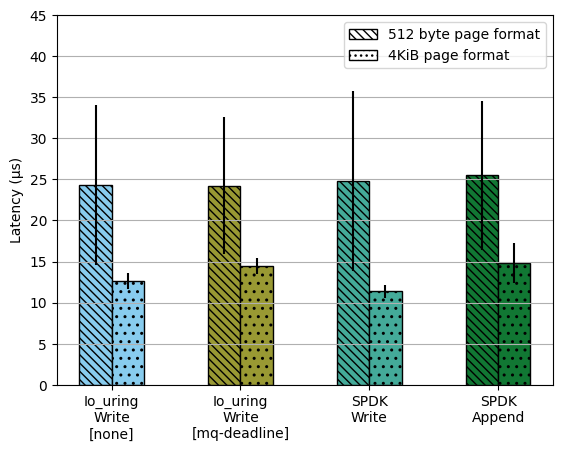

In [119]:
# Marker 3
fig, ax = plt.subplots()

kiops_512 = []
kiopse_512 = []
bs_512 = 512
for path in [
           BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "write", 1, 1, bs_512
            ),
            BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, 1, bs_512
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "write", 1, 1, bs_512
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, 1, bs_512
            )
]:
    dat = parse_fio_file(path)
    kiops_512.append(dat.lat_mean / 1000)
    kiopse_512.append(dat.lat_stdef / 1000)
k512 = ax.bar([x-0.125 for x in range(4)], kiops_512, yerr=kiopse_512, align='center', 
              color=[write_none_col, write_mq_deadline_col, write_col, append_col], 
              width=0.25, label="512 byte pagesize format", 
              hatch=lbaf0_pattern, edgecolor = "black", ecolor="black")

kiops_4k = []
kiopse_4k = []
bs_4096 = 4096
for path in [
           BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "write", 1, 1, bs_4096
            ),
            BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, 1, bs_4096
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", 1, 1, bs_4096
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, 1, bs_4096
            )
]:
    dat = parse_fio_file(path)
    kiops_4k.append(dat.lat_mean / 1000)
    kiopse_4k.append(dat.lat_stdef / 1000)
k4 = ax.bar([x+0.125 for x in range(4)], kiops_4k, yerr=kiopse_4k, align='center', 
            color=[write_none_col, write_mq_deadline_col, write_col, append_col], 
            width=0.25, label="4KiB pagesize format", 
            hatch=lbaf2_pattern, edgecolor = "black", ecolor="black")


plt.ylabel("Latency (μs)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 45)

plot_512_patch = mpatches.Patch(facecolor='white', label='512 byte page format'
                                ,hatch=lbaf0_pattern, edgecolor = "black")
plot_4KiB_patch = mpatches.Patch(facecolor='white', label='4KiB page format',
                                 hatch='...', edgecolor = "black")

plt.legend(handles = [plot_512_patch, plot_4KiB_patch])

ax.set_xticks(range(4), labels=["Io_uring\nWrite\n[none]", "Io_uring\nWrite\n[mq-deadline]", "SPDK\nWrite", "SPDK\nAppend"])
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf_512_versus_lbaf_4KiB(QD=1).pdf")

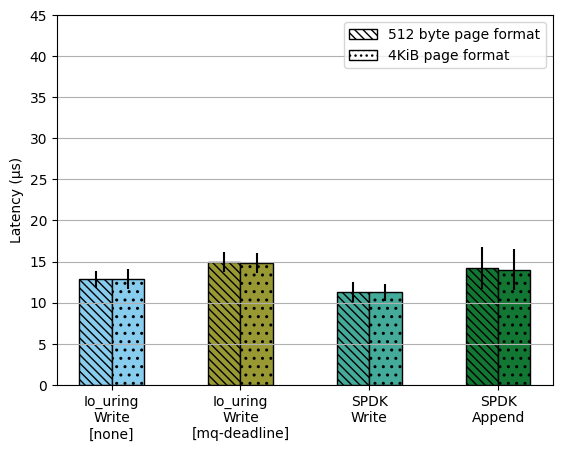

In [118]:
# Marker 3
fig, ax = plt.subplots()

kiops_512 = []
kiopse_512 = []
bs_512=8192
for path in [
           BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "write", 1, 1, bs_512
            ),
            BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, 1, bs_512
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "write", 1, 1, bs_512
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, 1, bs_512
            )
]:
    dat = parse_fio_file(path)
    kiops_512.append(dat.lat_mean / 1000)
    kiopse_512.append(dat.lat_stdef / 1000)
k512 = ax.bar([x-0.125 for x in range(4)], kiops_512, yerr=kiopse_512, align='center', 
              color=[write_none_col, write_mq_deadline_col, write_col, append_col], 
              width=0.25, label="512 byte pagesize format", 
              hatch=lbaf0_pattern, edgecolor = "black", ecolor="black")

kiops_4k = []
kiopse_4k = []
bs_4k=8192
for path in [
           BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "write", 1, 1, bs_4k
            ),
            BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, 1, bs_4k
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", 1, 1, bs_4k
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, 1, bs_4k
            )
]:
    dat = parse_fio_file(path)
    kiops_4k.append(dat.lat_mean / 1000)
    kiopse_4k.append(dat.lat_stdef / 1000)
k4 = ax.bar([x+0.125 for x in range(4)], kiops_4k, yerr=kiopse_4k, align='center', 
            color=[write_none_col, write_mq_deadline_col, write_col, append_col], 
            width=0.25, label="4KiB pagesize format", 
            hatch=lbaf2_pattern, edgecolor = "black", ecolor="black")


plt.ylabel("Latency (μs)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 45)

plot_512_patch = mpatches.Patch(facecolor='white', label='512 byte page format', 
                                hatch=lbaf0_pattern, edgecolor = "black")
plot_4KiB_patch = mpatches.Patch(facecolor='white', label='4KiB page format', 
                                 hatch='...', edgecolor = "black")

plt.legend(handles = [plot_512_patch, plot_4KiB_patch])

ax.set_xticks(range(4), labels=["Io_uring\nWrite\n[none]", "Io_uring\nWrite\n[mq-deadline]", "SPDK\nWrite", "SPDK\nAppend"])
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf_512_versus_lbaf_4KiB_8KiB_requests(QD=1).pdf")

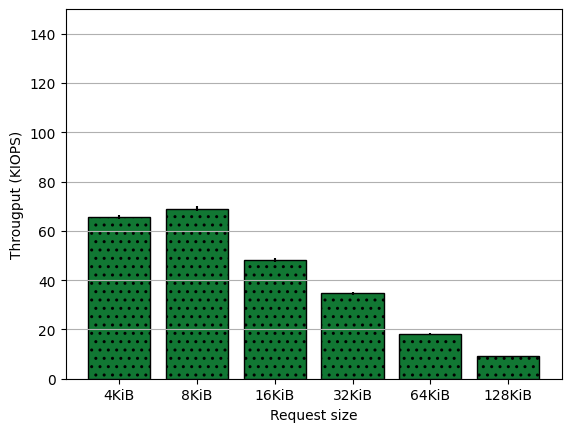

In [116]:
qd = 1
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 150)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color=append_col, 
       hatch=lbaf2_pattern, edgecolor = "black", ecolor="black")
ax.set_xticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf4KiB_optimal_append_size.pdf")

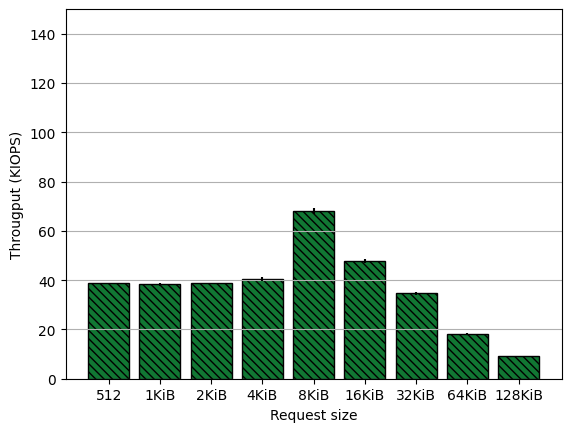

In [115]:
qd = 1
bss = [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 150)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color=append_col, 
       hatch=lbaf0_pattern, edgecolor = "black", ecolor="black")
ax.set_xticks(range(len(bss)), labels=["512", "1KiB", "2KiB", "4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf512_optimal_append_size.pdf")

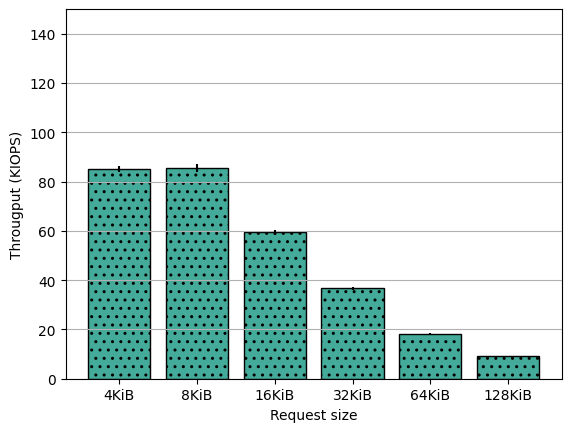

In [114]:
qd = 1
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 150)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color=write_col, 
       hatch=lbaf2_pattern, edgecolor = "black", ecolor="black")
ax.set_xticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf4KiB_optimal_spdk_write_size.pdf")

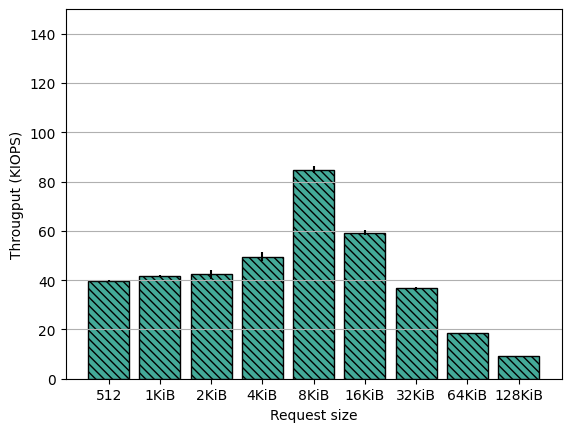

In [113]:
qd = 1
bss = [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "write", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 150)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color=write_col, 
       hatch=lbaf0_pattern, edgecolor = "black", ecolor="black")
ax.set_xticks(range(len(bss)), labels=["512", "1KiB", "2KiB", "4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf512_optimal_spdk_write_size.pdf")

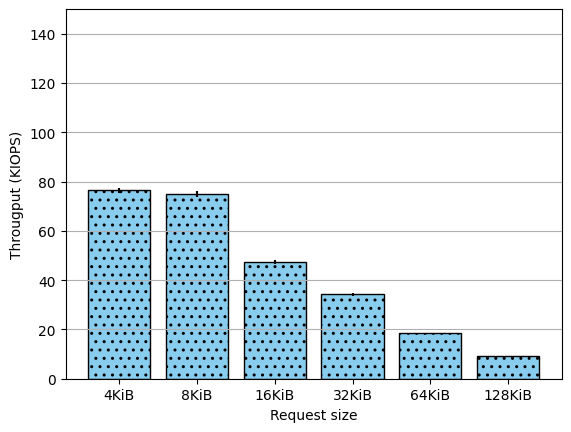

In [112]:
qd = 1
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "write", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 150)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color=write_none_col, 
       hatch=lbaf2_pattern, edgecolor = "black", ecolor="black")
ax.set_xticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf4KiB_optimal_io_uring_write_none_size.pdf")

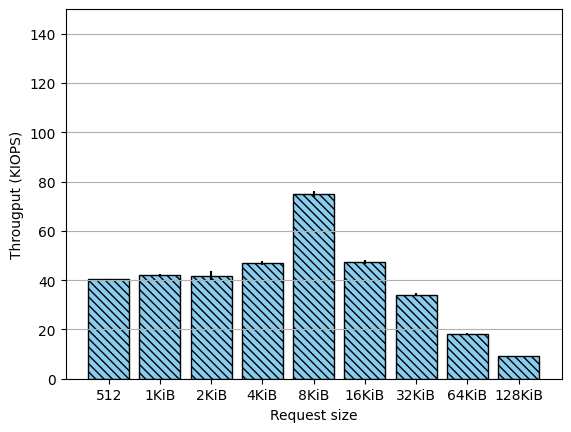

In [111]:
qd = 1
bss = [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "write", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 150)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color=write_none_col, 
       hatch=lbaf0_pattern, edgecolor = "black", ecolor="black")
ax.set_xticks(range(len(bss)), labels=["512", "1KiB", "2KiB", "4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf512_optimal_io_uring_write_none_size.pdf")

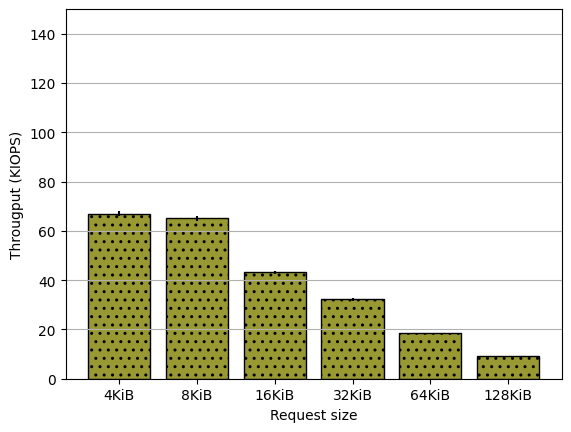

In [110]:
qd = 1
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 150)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color=write_mq_deadline_col, 
       hatch=lbaf2_pattern, edgecolor = "black", ecolor="black")
ax.set_xticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf4KiB_optimal_io_uring_write_mq_deadline_size.pdf")

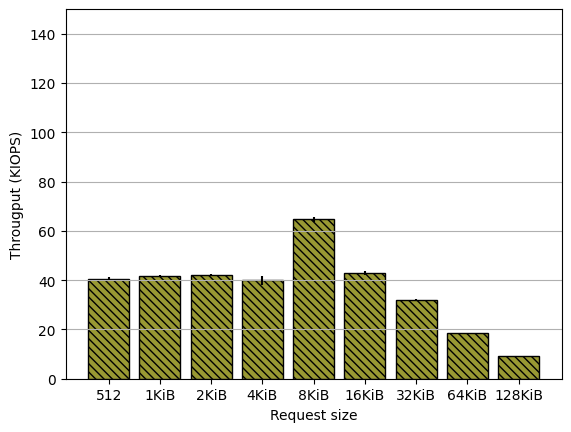

In [109]:
qd = 1
bss = [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 150)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color=write_mq_deadline_col, 
       hatch=lbaf0_pattern, edgecolor = "black", ecolor="black")
ax.set_xticks(range(len(bss)), labels=["512", "1KiB", "2KiB", "4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf512_optimal_io_uring_write_mq_deadline_size.pdf")

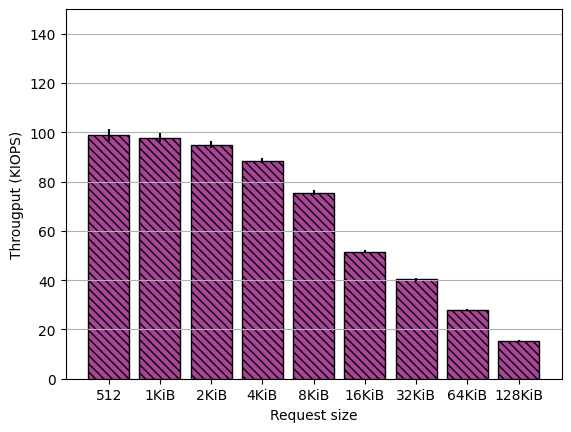

In [105]:
qd = 1
bss = [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "readmq", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 150)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color=read_mq_deadline_col, 
       hatch=lbaf0_pattern, edgecolor = "black", ecolor="black")
ax.set_xticks(range(len(bss)), labels=["512", "1KiB", "2KiB", "4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf512_optimal_io_uring_read_mq_deadline_size.pdf")

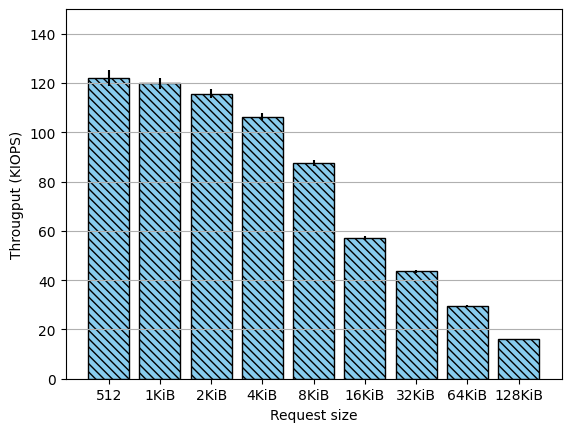

In [106]:
qd = 1
bss = [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 150)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color=read_none_col, 
       hatch=lbaf0_pattern, edgecolor = "black", ecolor="black")
ax.set_xticks(range(len(bss)), labels=["512", "1KiB", "2KiB", "4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf512_optimal_io_uring_read_none_size.pdf")

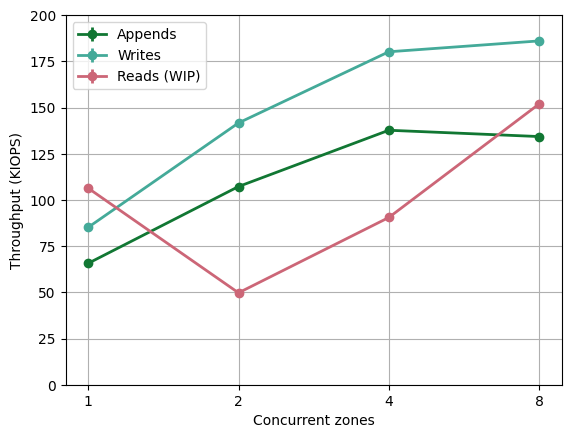

In [197]:
fig, ax = plt.subplots()
plt.xlabel("Concurrent zones")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", qd, 1, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Appends",
    color=append_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", qd, 1, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Writes",
    color=write_col,
    fmt='-o',
)


kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", qd, 1, 4096
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Reads (WIP)",
    color=read_col,
    fmt='-o',
)
                
plt.ylim(0, 200)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])
#ax.set_xlim(0,3)

plt.legend()
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf4KiB_concurrent_zone_scalability.pdf")

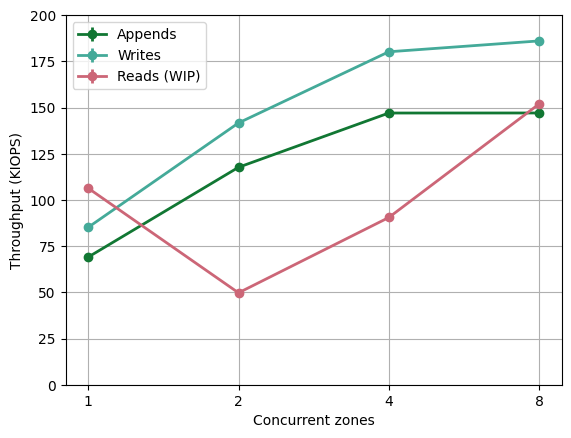

In [203]:
fig, ax = plt.subplots()
plt.xlabel("Concurrent zones")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", qd, 1, 8192
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Appends",
    color=append_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", qd, 1, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Writes",
    color=write_col,
    fmt='-o',
)


kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", qd, 1, 4096
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Reads (WIP)",
    color=read_col,
    fmt='-o',
)
                
plt.ylim(0, 200)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])
#ax.set_xlim(0,3)

plt.legend()
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf4KiB_concurrent_zone_scalability_optimal_request_sizes.pdf")

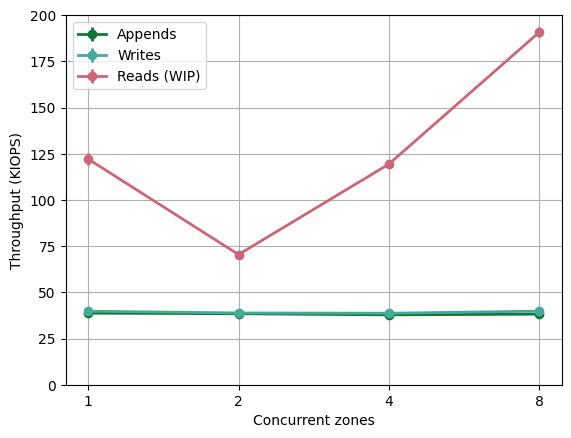

In [202]:
fig, ax = plt.subplots()
plt.xlabel("Concurrent zones")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", qd, 1, 512
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Appends",
    color=append_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "write", qd, 1, 512
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Writes",
    color=write_col,
    fmt='-o',
)


kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", qd, 1, 512
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Reads (WIP)",
    color=read_col,
    fmt='-o',
)
                
plt.ylim(0, 200)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])
#ax.set_xlim(0,3)

plt.legend()
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf512_concurrent_zone_scalability.pdf")

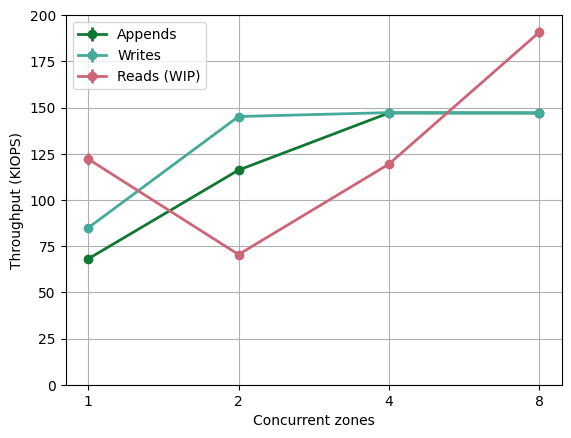

In [201]:
fig, ax = plt.subplots()
plt.xlabel("Concurrent zones")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", qd, 1, 8192
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Appends",
    color=append_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "write", qd, 1, 8192
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Writes",
    color=write_col,
    fmt='-o',
)


kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", qd, 1, 512
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Reads (WIP)",
    color=read_col,
    fmt='-o',
)
                
plt.ylim(0, 200)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])
#ax.set_xlim(0,3)

plt.legend()
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf512_concurrent_zone_scalability_optimal_request_sizes.pdf")

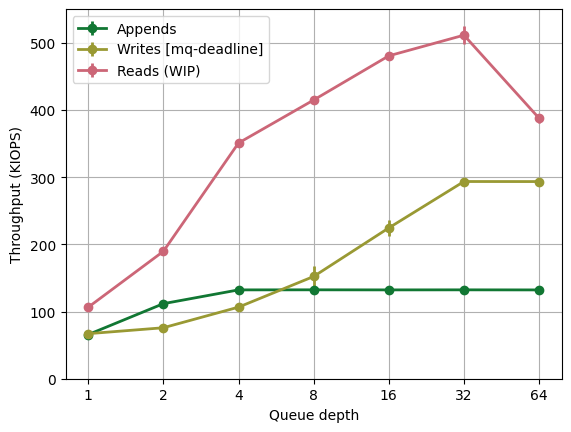

In [204]:
fig, ax = plt.subplots()
plt.xlabel("Queue depth")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8,16, 32, 64]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Appends",
    color=append_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Writes [mq-deadline]",
    color=write_mq_deadline_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)
    
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Reads (WIP)",
    color=read_col,
    fmt='-o',
)

                
plt.ylim(0, 550)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])

plt.legend()
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf4KiB_1zone_scalability.pdf")

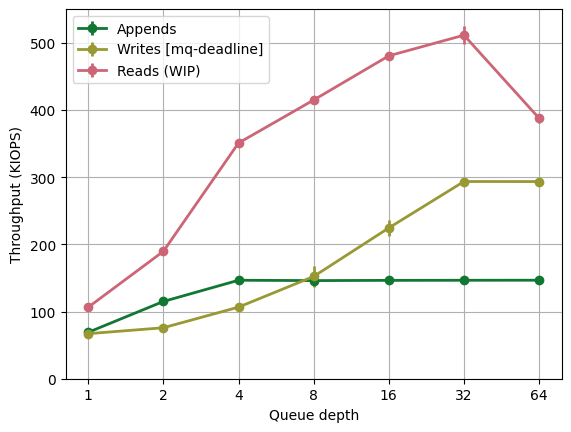

In [208]:
fig, ax = plt.subplots()
plt.xlabel("Queue depth")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8,16, 32, 64]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 8192
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Appends",
    color=append_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Writes [mq-deadline]",
    color=write_mq_deadline_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)
    
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Reads (WIP)",
    color=read_col,
    fmt='-o',
)

                
plt.ylim(0, 550)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])

plt.legend()
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf4KiB_1zone_scalability_optimal_request_sizes.pdf")

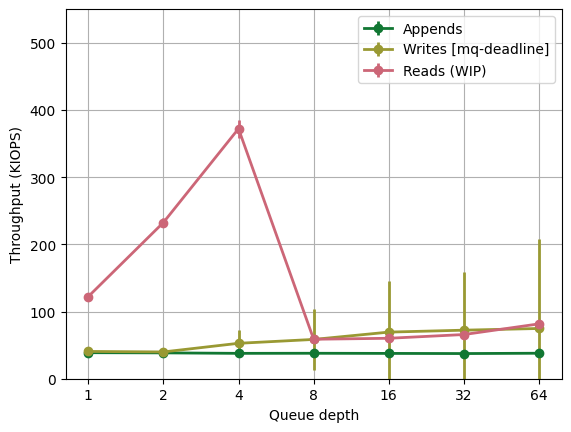

In [211]:
fig, ax = plt.subplots()
plt.xlabel("Queue depth")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8,16, 32, 64]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, qd, 512
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Appends",
    color=append_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, qd, 512
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Writes [mq-deadline]",
    color=write_mq_deadline_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", 1, qd, 512
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)
    
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Reads (WIP)",
    color=read_col,
    fmt='-o',
)

                
plt.ylim(0, 550)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])

plt.legend()
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf512_1zone_scalability.pdf")

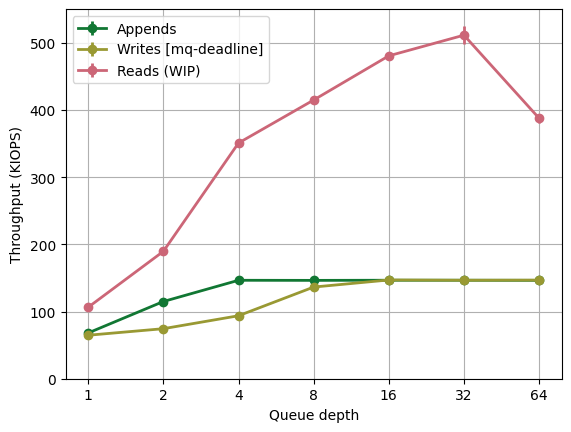

In [214]:
fig, ax = plt.subplots()
plt.xlabel("Queue depth")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8,16, 32, 64]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, qd, 8192
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Appends",
    color=append_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, qd, 8192
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Writes [mq-deadline]",
    color=write_mq_deadline_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)
    
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Reads (WIP)",
    color=read_col,
    fmt='-o',
)

                
plt.ylim(0, 550)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])

plt.legend()
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf512_1zone_scalability_optimal_request_sizes.pdf")

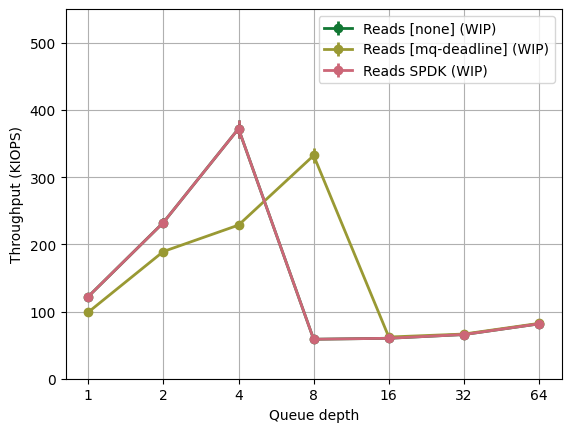

In [217]:
fig, ax = plt.subplots()
plt.xlabel("Queue depth")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8,16, 32, 64]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", 1, qd, 512
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Reads [none] (WIP)",
    color=append_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "readmq", 1, qd, 512
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Reads [mq-deadline] (WIP)",
    color=write_mq_deadline_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", 1, qd, 512
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)
    
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Reads SPDK (WIP)",
    color=read_col,
    fmt='-o',
)

                
plt.ylim(0, 550)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])

plt.legend()
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf512_read_versus_read_scalability.pdf")

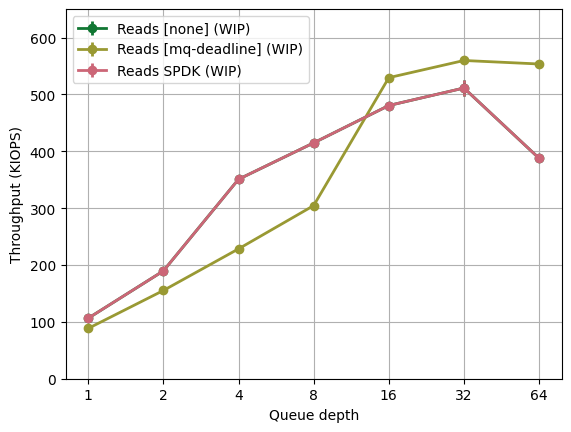

In [220]:
fig, ax = plt.subplots()
plt.xlabel("Queue depth")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8,16, 32, 64]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Reads [none] (WIP)",
    color=append_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "readmq", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Reads [mq-deadline] (WIP)",
    color=write_mq_deadline_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)
    
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Reads SPDK (WIP)",
    color=read_col,
    fmt='-o',
)

                
plt.ylim(0, 650)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])

plt.legend()
fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/lbaf4KiB_read_versus_read_scalability.pdf")